# Adult data from UCL machine learning repository

## Importing packages

In [134]:
import numpy as np
import pandas as pd

## Importing csv file of adult ie adult.data

In [135]:
data = pd.read_csv('adult.data',header=None,skipinitialspace=True)

In [136]:
data.head(2)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K


## Changing column heading

In [137]:
data.columns = ('age', 'workclass', 'fnlwgt', 'education', 'educational_num','marital_status', 'occupation', 'relationship', 'race', 'gender','capital_gain', 'capital_loss', 'hours_per_week', 'native_country','income_category')

## Creating income category
(1 for >50K) and (0 for <=50K)

In [138]:
data.loc[data.income_category == '<=50K', 'income_category'] = 1
data.loc[data.income_category == '>50K', 'income_category'] = 0

In [139]:
data.income_category = data.income_category.astype(int)

In [140]:
data.head(5)

,age,workclass,fnlwgt,education,educational_num,marital_status,occupation,relationship,race,gender,capital_gain,capital_loss,hours_per_week,native_country,income_category
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,1
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,1
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,1
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,1
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,1


In [141]:
data.describe()

,age,fnlwgt,educational_num,capital_gain,capital_loss,hours_per_week,income_category
count,32561.000000,3.256100e+04,32561.000000,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.581647,1.897784e+05,10.080679,1077.648844,87.303830,40.437456,0.759190
std,13.640433,1.055500e+05,2.572720,7385.292085,402.960219,12.347429,0.427581
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000,0.000000
25%,28.000000,1.178270e+05,9.000000,0.000000,0.000000,40.000000,1.000000
50%,37.000000,1.783560e+05,10.000000,0.000000,0.000000,40.000000,1.000000
75%,48.000000,2.370510e+05,12.000000,0.000000,0.000000,45.000000,1.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000,1.000000


In [142]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
age                32561 non-null int64
workclass          32561 non-null object
fnlwgt             32561 non-null int64
education          32561 non-null object
educational_num    32561 non-null int64
marital_status     32561 non-null object
occupation         32561 non-null object
relationship       32561 non-null object
race               32561 non-null object
gender             32561 non-null object
capital_gain       32561 non-null int64
capital_loss       32561 non-null int64
hours_per_week     32561 non-null int64
native_country     32561 non-null object
income_category    32561 non-null int32
dtypes: int32(1), int64(6), object(8)
memory usage: 3.6+ MB


## Converting missing values to NaN

missing value is represented by '?', so we need to convert that to NaN i.e not a number

In [143]:
data.replace(['?'], np.nan, inplace = True)

In [144]:
#Showing '?' is conver to NaN
data.loc[(data.age == 39)&(data.educational_num == 14)&(data.capital_gain == 3464), :]

,age,workclass,fnlwgt,education,educational_num,marital_status,occupation,relationship,race,gender,capital_gain,capital_loss,hours_per_week,native_country,income_category
297,39,NaN,157443,Masters,14,Married-civ-spouse,NaN,Wife,Asian-Pac-Islander,Female,3464,0,40,NaN,1


## Checking if there other null data interm of extreme high or low (outliers) by using box plot

importing matplotlib in spyder

In [145]:
%matplotlib inline

creating box plot of whole set

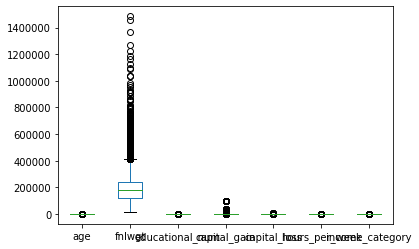

In [146]:
data.plot(kind = 'box')

### Generating box plot to analyse each numric column

#### Generating box plot of age

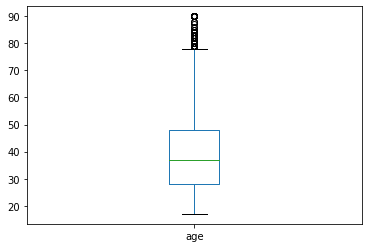

In [147]:
data.age.plot(kind = 'box')

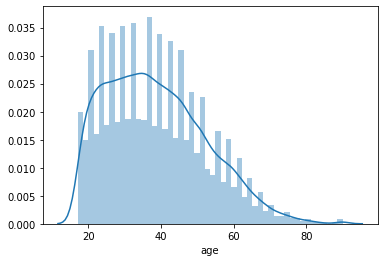

In [148]:
import seaborn as sb
sb.distplot(data.age)

Since age seems to start from around 10 and can be up to 90, so there is no any outliers in age

#### Generating box plot of educational_num

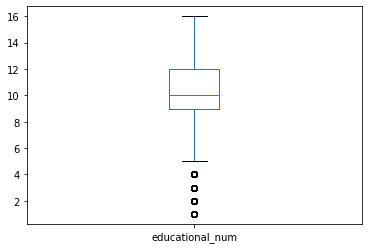

In [149]:
data.educational_num.plot(kind = 'box')

The data seems to be good without any extreme values

#### Generating box plot of capital gain

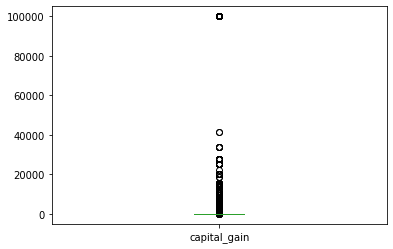

In [150]:
data.capital_gain.plot(kind = 'box') 

In [151]:
import matplotlib.pyplot as plt

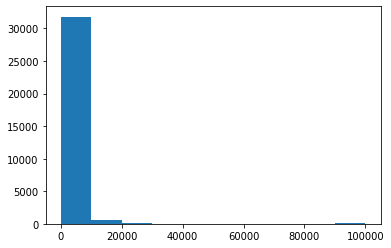

In [152]:
plt.hist(data.capital_gain);

One extreme value (i.e point outlier) is seen, so we are going to remove it

In [153]:
data.loc[data.capital_gain>=99000, 'capital_gain'] = np.nan

Again viewing in box plot

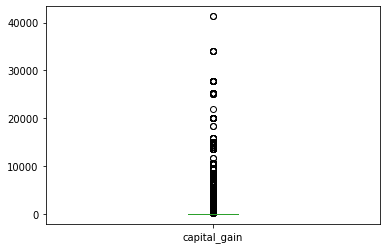

In [154]:
data.capital_gain.plot(kind = 'box')

As capital gain can be zero to individual who donot sale any capital assets , so we cannot take 0 in outliers

#### Generating box plot of hours_per_week

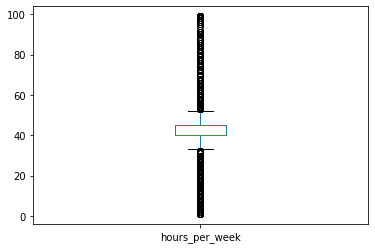

In [155]:
data.hours_per_week.plot(kind = 'box')

Converting hours_per_week to integer